## <b>BTech Capstone Project

# Remote Landslide Detection using Semantic Segmentation</b>

Group: B78

Group Members:


*   Atharva Pansare (1032190839)
*   Atharva Pargaonkar (1032190972)
*   Shreyas Konjerla (1032190842)
*   Chayan Jain (1032192124)

Project Guide: Dr. Pranali Kosamkar

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Dataset Exploration

In [ ]:
import os
import h5py

img_file = h5py.File("drive/MyDrive/CAPSTONE LANDSLIDE/data/TrainData/img/image_2000.h5")
image = np.array(img_file.get("img"))

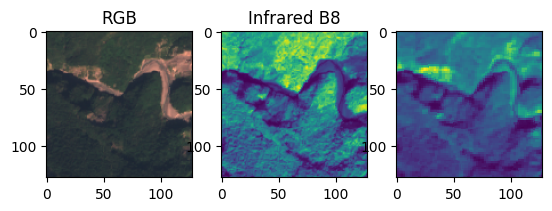

In [ ]:
max_rgb = image[:,:,1:4].max()
f, ax = plt.subplots(1, 3)
ax[0].imshow(image[:,:,3:0:-1] / max_rgb)
ax[0].title.set_text("RGB")
ax[1].imshow(image[:,:,7])
ax[1].title.set_text("Infrared B8")
ax[2].imshow(image[:,:,11])

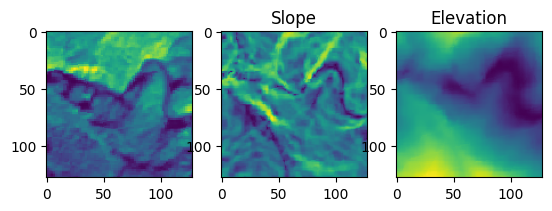

In [ ]:
f, ax = plt.subplots(1, 3)
ax[0].imshow(image[:,:,10])
ax[1].imshow(image[:,:,12])
ax[1].title.set_text("Slope")
ax[2].imshow(image[:,:,13])
ax[2].title.set_text("Elevation")

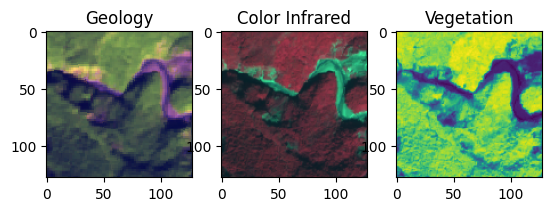

In [ ]:
geology = image[:,:,[11, 10, 1]]
color_ir = image[:,:,[7, 3, 2]]
8-3/8+4

veg_id = (image[:,:,7] - image[:,:,3]) / (image[:,:,7] + image[:,:,3])

f, ax2 = plt.subplots(1, 3)
ax2[0].imshow(geology / geology.max())
ax2[0].title.set_text("Geology")
ax2[1].imshow(color_ir / color_ir.max())
ax2[1].title.set_text("Color Infrared")
ax2[2].imshow(veg_id / veg_id.max())
ax2[2].title.set_text("Vegetation")

In [ ]:
mask_file = h5py.File("drive/MyDrive/CAPSTONE LANDSLIDE/data/TrainData/mask/mask_2000.h5")
mask = np.array(mask_file.get("mask"))

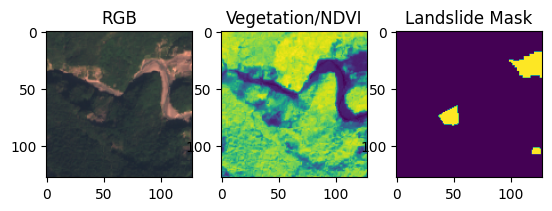

In [ ]:
f, ax3 = plt.subplots(1, 3)
ax3[0].imshow(image[:,:,3:0:-1] / max_rgb)
ax3[0].title.set_text("RGB")
ax3[1].imshow(veg_id / veg_id.max())
ax3[1].title.set_text("Vegetation/NDVI")
ax3[2].imshow(mask)
ax3[2].title.set_text("Landslide Mask")

### Loading the dataset

In [ ]:
import glob
TRAIN_PATH = r"drive/MyDrive/CAPSTONE LANDSLIDE/data/TrainData/img/*.h5"
TRAIN_MASK = r"drive/MyDrive/CAPSTONE LANDSLIDE/data/TrainData/mask/*.h5"

# There are 3799 images in the dataset of size 128x128 and 6 channels (R, G, B, NDVI, Slope, Elevation)
X_train = np.zeros((3799, 128, 128, 6))
y_train = np.zeros((3799, 128, 128, 1))
all_train = sorted(glob.glob(TRAIN_PATH))
all_mask = sorted(glob.glob(TRAIN_MASK))

In [ ]:
for i, (img, mask) in enumerate(zip(all_train, all_mask)):
    print(i, img, mask)
    with h5py.File(img) as hdf:
        ls = list(hdf.keys())
        data = np.array(hdf.get('img'))

        # Set Missing Value to minimum
        data[np.isnan(data)] = 0.000001

        # Datat normalization
        max_rgb = data[:, :, 1:4].max()
        max_slope = data[:, :, 12].max()
        max_elevation = data[:, :, 13].max()

        # ndvi calculation according to table
        data_ndvi = (image[:,:,7] - image[:,:,3]) / (image[:,:,7] + image[:,:,3]))

        # final array
        X_train[i, :, :, 0] = 1 - data[:, :, 3] / max_rgb  #RED
        X_train[i, :, :, 1] = 1 - data[:, :, 2] / max_rgb #GREEN
        X_train[i, :, :, 2] = 1 - data[:, :, 1] / max_rgb #BLUE
        X_train[i, :, :, 3] = data_ndvi #NDVI
        X_train[i, :, :, 4] = 1 - data[:, :, 12] / max_slope #SLOPE
        X_train[i, :, :, 5] = 1 - data[:, :, 13] / max_elevation #ELEVATION


    with h5py.File(mask) as hdf:
        ls = list(hdf.keys())
        data=np.array(hdf.get('mask'))
        y_train[i, :, :, 0] = data

0 data/Train/img/image_1.h5 data/Train/mask/mask_1.h5
1 data/Train/img/image_10.h5 data/Train/mask/mask_10.h5
2 data/Train/img/image_100.h5 data/Train/mask/mask_100.h5
3 data/Train/img/image_1000.h5 data/Train/mask/mask_1000.h5
4 data/Train/img/image_1001.h5 data/Train/mask/mask_1001.h5
5 data/Train/img/image_1002.h5 data/Train/mask/mask_1002.h5
6 data/Train/img/image_1003.h5 data/Train/mask/mask_1003.h5
7 data/Train/img/image_1004.h5 data/Train/mask/mask_1004.h5
8 data/Train/img/image_1005.h5 data/Train/mask/mask_1005.h5
9 data/Train/img/image_1006.h5 data/Train/mask/mask_1006.h5
10 data/Train/img/image_1007.h5 data/Train/mask/mask_1007.h5
11 data/Train/img/image_1008.h5 data/Train/mask/mask_1008.h5
12 data/Train/img/image_1009.h5 data/Train/mask/mask_1009.h5
13 data/Train/img/image_101.h5 data/Train/mask/mask_101.h5
14 data/Train/img/image_1010.h5 data/Train/mask/mask_1010.h5
15 data/Train/img/image_1011.h5 data/Train/mask/mask_1011.h5
16 data/Train/img/image_1012.h5 data/Train/mask/

<ipython-input-11-b831676fb87b>:25: RuntimeWarning: invalid value encountered in true_divide
  TRAIN_XX[i, :, :, 4] = 1 - data[:, :, 12] / mid_slope #SLOPE


1680 data/Train/img/image_2510.h5 data/Train/mask/mask_2510.h5
1681 data/Train/img/image_2511.h5 data/Train/mask/mask_2511.h5
1682 data/Train/img/image_2512.h5 data/Train/mask/mask_2512.h5
1683 data/Train/img/image_2513.h5 data/Train/mask/mask_2513.h5
1684 data/Train/img/image_2514.h5 data/Train/mask/mask_2514.h5
1685 data/Train/img/image_2515.h5 data/Train/mask/mask_2515.h5
1686 data/Train/img/image_2516.h5 data/Train/mask/mask_2516.h5
1687 data/Train/img/image_2517.h5 data/Train/mask/mask_2517.h5
1688 data/Train/img/image_2518.h5 data/Train/mask/mask_2518.h5
1689 data/Train/img/image_2519.h5 data/Train/mask/mask_2519.h5
1690 data/Train/img/image_252.h5 data/Train/mask/mask_252.h5
1691 data/Train/img/image_2520.h5 data/Train/mask/mask_2520.h5
1692 data/Train/img/image_2521.h5 data/Train/mask/mask_2521.h5
1693 data/Train/img/image_2522.h5 data/Train/mask/mask_2522.h5
1694 data/Train/img/image_2523.h5 data/Train/mask/mask_2523.h5
1695 data/Train/img/image_2524.h5 data/Train/mask/mask_25

<ipython-input-11-b831676fb87b>:18: RuntimeWarning: invalid value encountered in true_divide
  data_ndvi = np.divide(data_nir - data_red,np.add(data_nir, data_red))


2273 data/Train/img/image_3044.h5 data/Train/mask/mask_3044.h5
2274 data/Train/img/image_3045.h5 data/Train/mask/mask_3045.h5
2275 data/Train/img/image_3046.h5 data/Train/mask/mask_3046.h5
2276 data/Train/img/image_3047.h5 data/Train/mask/mask_3047.h5
2277 data/Train/img/image_3048.h5 data/Train/mask/mask_3048.h5
2278 data/Train/img/image_3049.h5 data/Train/mask/mask_3049.h5
2279 data/Train/img/image_305.h5 data/Train/mask/mask_305.h5
2280 data/Train/img/image_3050.h5 data/Train/mask/mask_3050.h5
2281 data/Train/img/image_3051.h5 data/Train/mask/mask_3051.h5
2282 data/Train/img/image_3052.h5 data/Train/mask/mask_3052.h5
2283 data/Train/img/image_3053.h5 data/Train/mask/mask_3053.h5
2284 data/Train/img/image_3054.h5 data/Train/mask/mask_3054.h5
2285 data/Train/img/image_3055.h5 data/Train/mask/mask_3055.h5
2286 data/Train/img/image_3056.h5 data/Train/mask/mask_3056.h5
2287 data/Train/img/image_3057.h5 data/Train/mask/mask_3057.h5
2288 data/Train/img/image_3058.h5 data/Train/mask/mask_30

Saving the dataset in Numpy array format

In [ ]:
import pickle as pkl

filename = "TRAIN_XX"
with open(filename, 'wb') as fileObject:
    pkl.dump(X_train, fileObject)

filename = "TRAIN_YY"
with open(filename, 'wb') as fileObject:
    pkl.dump(y_train, fileObject)

print("done!")

done!


Load the dataset (if required)

In [ ]:
import pickle as pkl

filename = "drive/MyDrive/CAPSTONE LANDSLIDE/TRAIN_XX"
with open(filename, 'rb') as fileObject:
    X_train = pkl.load(fileObject)

filename = "drive/MyDrive/CAPSTONE LANDSLIDE/TRAIN_YY"
with open(filename, 'rb') as fileObject:
    y_train = pkl.load(fileObject)

In [ ]:
X_train.shape, y_train.shape

((3799, 128, 128, 6), (3799, 128, 128, 1))

In [ ]:
# Deal with missing values
X_train[np.isnan(X_train)] = 0.000001

Splitting the dataset into training and testing

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, X_test.shape

((3039, 128, 128, 6), (760, 128, 128, 6))

### Defining Custom Metrics

In [ ]:
from tensorflow.keras import backend as K

def dice_coef(y_true, y_pred, smooth=1):
    y_true_flatten = K.flatten(y_true)
    y_pred_flatten = K.flatten(y_pred)

    intersection = K.sum(y_true_flatten * y_pred_flatten)
    union = K.sum(y_true_flatten) + K.sum(y_pred_flatten)
    return (2 * intersection + smooth) / (union + smooth)

def iou_coef(y_true, y_pred, smooth=1):
    intersection = K.sum(y_true * y_pred)
    sum = K.sum(y_true + y_pred)
    iou = (intersection + smooth) / (sum - intersection + smooth)
    return iou

In [ ]:
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Conv2DTranspose, concatenate, Input
import tensorflow as tf

def unet_model(IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS):
    inputs = Input((IMG_WIDTH, IMG_HIGHT, IMG_CHANNELS))

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(inputs)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = tf.keras.Model(inputs=[inputs], outputs=[outputs])

    return model

In [ ]:
model = unet_model(128, 128, 6)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', dice_coef, iou_coef])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 6  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  880         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 128, 128, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [ ]:
history = model.fit(X_train, y_train, batch_size=16,
          epochs=100,
          verbose = 2,
          validation_data=(X_test, y_test))

Epoch 1/100
190/190 - 35s - loss: 0.0755 - accuracy: 0.9754 - dice_coef: 0.2582 - iou_coef: 0.1544 - val_loss: 0.0499 - val_accuracy: 0.9817 - val_dice_coef: 0.3761 - val_iou_coef: 0.2346 - 35s/epoch - 186ms/step
Epoch 2/100
190/190 - 9s - loss: 0.0475 - accuracy: 0.9826 - dice_coef: 0.4071 - iou_coef: 0.2593 - val_loss: 0.0437 - val_accuracy: 0.9838 - val_dice_coef: 0.4744 - val_iou_coef: 0.3156 - 9s/epoch - 48ms/step
Epoch 3/100
190/190 - 9s - loss: 0.0416 - accuracy: 0.9845 - dice_coef: 0.4759 - iou_coef: 0.3169 - val_loss: 0.0419 - val_accuracy: 0.9845 - val_dice_coef: 0.4367 - val_iou_coef: 0.2840 - 9s/epoch - 48ms/step
Epoch 4/100
190/190 - 9s - loss: 0.0376 - accuracy: 0.9858 - dice_coef: 0.5171 - iou_coef: 0.3536 - val_loss: 0.0399 - val_accuracy: 0.9851 - val_dice_coef: 0.4960 - val_iou_coef: 0.3363 - 9s/epoch - 49ms/step
Epoch 5/100
190/190 - 9s - loss: 0.0362 - accuracy: 0.9861 - dice_coef: 0.5215 - iou_coef: 0.3583 - val_loss: 0.0358 - val_accuracy: 0.9863 - val_dice_coef: 

In [ ]:
history2 = model.fit(X_train, y_train,
                     epochs=20,
                     verbose=2,
                     validation_data=(X_test, y_test)
)

Epoch 1/20
95/95 - 16s - loss: 0.0200 - accuracy: 0.9917 - dice_coef: 0.7316 - iou_coef: 0.5782 - val_loss: 0.0350 - val_accuracy: 0.9882 - val_dice_coef: 0.6674 - val_iou_coef: 0.5036 - 16s/epoch - 174ms/step
Epoch 2/20
95/95 - 9s - loss: 0.0194 - accuracy: 0.9919 - dice_coef: 0.7394 - iou_coef: 0.5876 - val_loss: 0.0340 - val_accuracy: 0.9881 - val_dice_coef: 0.6621 - val_iou_coef: 0.4978 - 9s/epoch - 95ms/step
Epoch 3/20
95/95 - 9s - loss: 0.0194 - accuracy: 0.9919 - dice_coef: 0.7385 - iou_coef: 0.5868 - val_loss: 0.0354 - val_accuracy: 0.9880 - val_dice_coef: 0.6580 - val_iou_coef: 0.4932 - 9s/epoch - 96ms/step
Epoch 4/20
95/95 - 9s - loss: 0.0192 - accuracy: 0.9920 - dice_coef: 0.7421 - iou_coef: 0.5913 - val_loss: 0.0350 - val_accuracy: 0.9881 - val_dice_coef: 0.6703 - val_iou_coef: 0.5072 - 9s/epoch - 94ms/step
Epoch 5/20
95/95 - 9s - loss: 0.0192 - accuracy: 0.9920 - dice_coef: 0.7384 - iou_coef: 0.5870 - val_loss: 0.0360 - val_accuracy: 0.9880 - val_dice_coef: 0.6582 - val_io

In [ ]:
model.save("drive/MyDrive/models/unet_basic_rgb120")

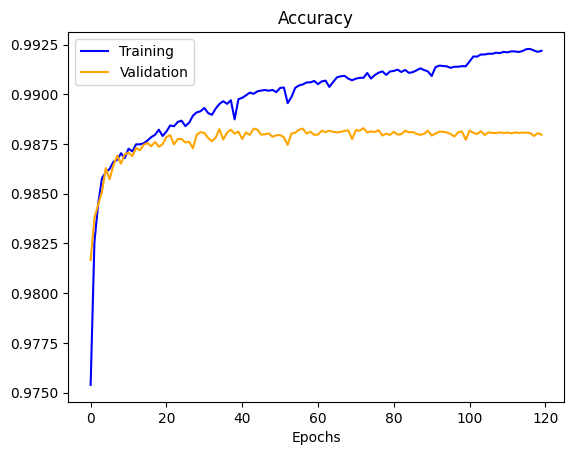

In [ ]:
accuracy = history.history["accuracy"] + history2.history["accuracy"]
val_accuracy = history.history["val_accuracy"] + history2.history["val_accuracy"]

plt.plot(range(120), accuracy, color="blue", label="Training")
plt.plot(range(120), val_accuracy, color="orange", label="Validation")
plt.legend()
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.show()

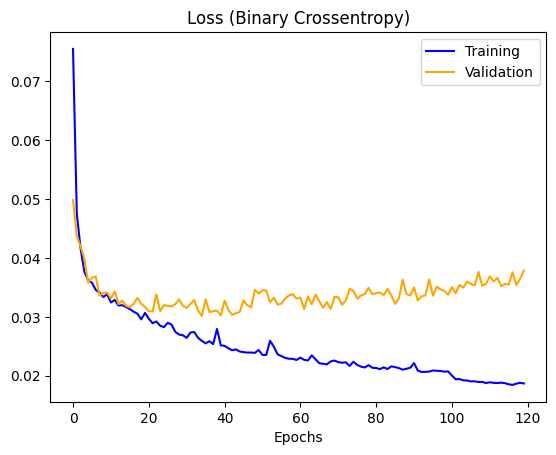

In [ ]:
loss = history.history["loss"] + history2.history["loss"]
val_loss = history.history["val_loss"] + history2.history["val_loss"]

plt.plot(range(120), loss, color="blue", label="Training")
plt.plot(range(120), val_loss, color="orange", label="Validation")
plt.legend()
plt.title("Loss (Binary Crossentropy)")
plt.xlabel("Epochs")
plt.show()

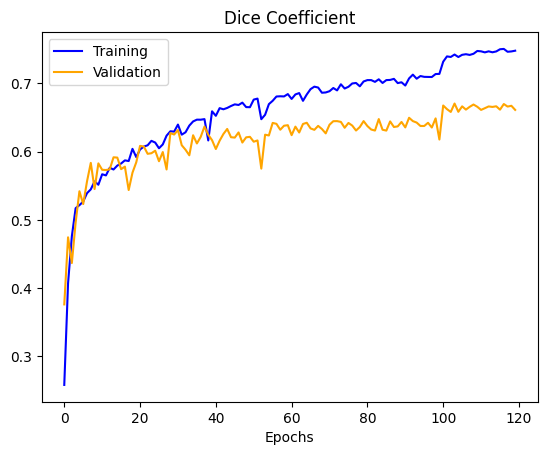

In [ ]:
dice = history.history["dice_coef"] + history2.history["dice_coef"]
val_dice = history.history["val_dice_coef"] + history2.history["val_dice_coef"]


plt.plot(range(120), dice, color="blue", label="Training")
plt.plot(range(120), val_dice, color="orange", label="Validation")
plt.legend()
plt.title("Dice Coefficient")
plt.xlabel("Epochs")
plt.show()

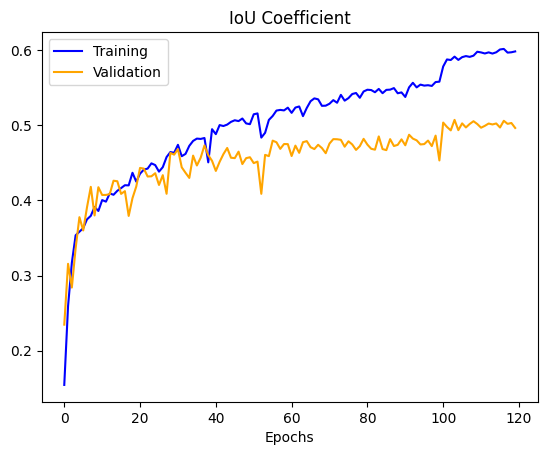

In [ ]:
iou = history.history["iou_coef"] + history2.history["iou_coef"]
val_iou = history.history["val_iou_coef"] + history2.history["val_iou_coef"]


plt.plot(range(120), iou, color="blue", label="Training")
plt.plot(range(120), val_iou, color="orange", label="Validation")
plt.legend()
plt.title("IoU Coefficient")
plt.xlabel("Epochs")
plt.show()

In [ ]:
print("Training Evaluation Metrics:\nLoss: {:0.5f}\nAccuracy: {:0.2f}%\n\
Dice Co-efficient: {:0.2f}%\nIoU: {:0.2f}%".format(loss[-1], accuracy[-1]*100, dice[-1]*100, iou[-1]*100))

Training Evaluation Metrics:
Loss: 0.01868
Accuracy: 99.22%
Dice Co-efficient: 74.77%
IoU: 59.83%


In [ ]:
print("Validation Evaluation Metrics:\nLoss: {:0.5f}\nAccuracy: {:0.2f}%\n\
Dice Co-efficient: {:0.2f}%\nIoU: {:0.2f}%".format(val_loss[-1], val_accuracy[-1]*100, val_dice[-1]*100, val_iou[-1]*100))

Validation Evaluation Metrics:
Loss: 0.03786
Accuracy: 98.80%
Dice Co-efficient: 66.10%
IoU: 49.64%


## Prediction

In [ ]:
predictions = model.predict(X_test[[10, 47, 88]])

1/1 [==============================] - 1s 1s/step


Text(0.5, 1.0, 'Actual/True Mask')

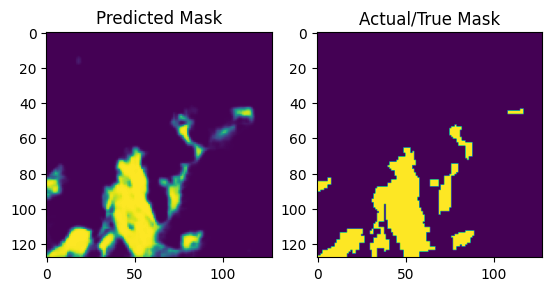

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(predictions[0])
plt.title("Predicted Mask")
plt.subplot(1, 2, 2)
plt.imshow(y_test[10])
plt.title("Actual/True Mask")

Text(0.5, 1.0, 'Actual/True Mask')

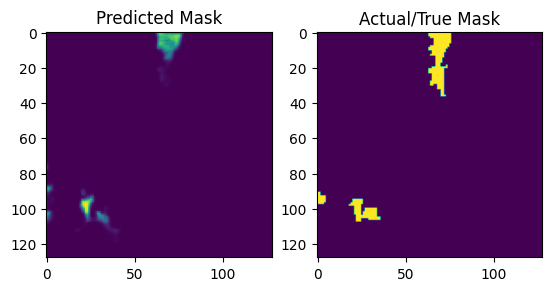

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(predictions[1])
plt.title("Predicted Mask")
plt.subplot(1, 2, 2)
plt.imshow(y_test[47])
plt.title("Actual/True Mask")

Text(0.5, 1.0, 'Actual/True Mask')

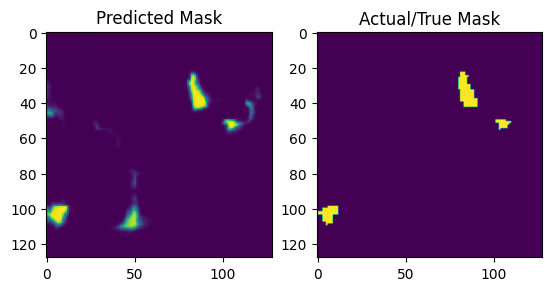

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(predictions[2])
plt.title("Predicted Mask")
plt.subplot(1, 2, 2)
plt.imshow(y_test[88])
plt.title("Actual/True Mask")

After some post-processing

In [ ]:
predictions[predictions < 0.3] = 0
predictions[predictions > 0.3] = 1

Text(0.5, 1.0, 'Actual/True Mask')

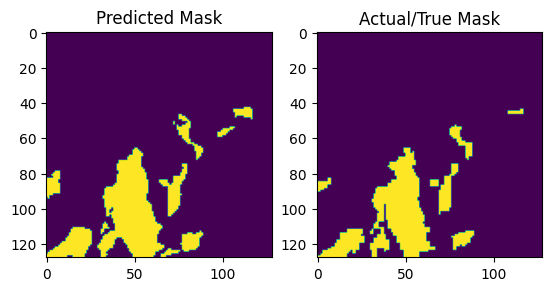

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(predictions[0])
plt.title("Predicted Mask")
plt.subplot(1, 2, 2)
plt.imshow(y_test[10])
plt.title("Actual/True Mask")

Text(0.5, 1.0, 'Actual/True Mask')

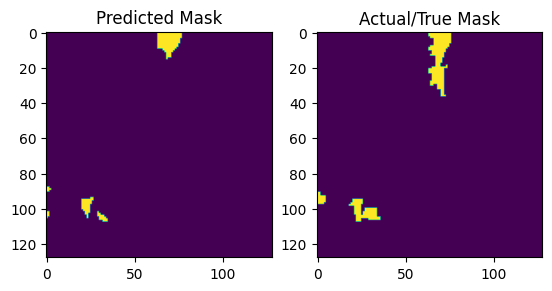

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(predictions[1])
plt.title("Predicted Mask")
plt.subplot(1, 2, 2)
plt.imshow(y_test[47])
plt.title("Actual/True Mask")

Text(0.5, 1.0, 'Actual/True Mask')

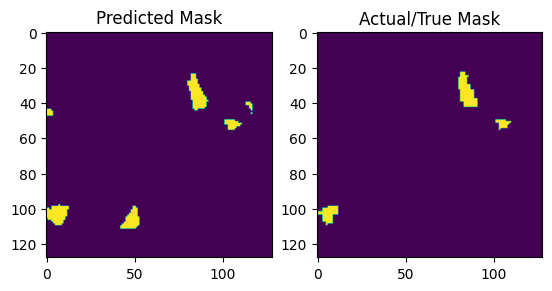

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(predictions[2])
plt.title("Predicted Mask")
plt.subplot(1, 2, 2)
plt.imshow(y_test[88])
plt.title("Actual/True Mask")

## UNet Model with Dice Loss

In [ ]:
def dice_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

In [ ]:
model_dice = unet_model(128, 128, 6)
model_dice.compile(optimizer='adam', loss=dice_loss, metrics=['accuracy', dice_coef, iou_coef])

In [ ]:
history_diceloss = model_dice.fit(X_train, y_train, epochs=100, verbose=2, validation_data=(X_test, y_test))

Epoch 1/100
95/95 - 34s - loss: 0.5516 - accuracy: 0.9445 - dice_coef: 0.4484 - iou_coef: 0.3041 - val_loss: 0.4210 - val_accuracy: 0.9825 - val_dice_coef: 0.5788 - val_iou_coef: 0.4111 - 34s/epoch - 361ms/step
Epoch 2/100
95/95 - 9s - loss: 0.3963 - accuracy: 0.9809 - dice_coef: 0.6037 - iou_coef: 0.4370 - val_loss: 0.3728 - val_accuracy: 0.9807 - val_dice_coef: 0.6273 - val_iou_coef: 0.4617 - 9s/epoch - 92ms/step
Epoch 3/100
95/95 - 9s - loss: 0.3694 - accuracy: 0.9828 - dice_coef: 0.6306 - iou_coef: 0.4643 - val_loss: 0.3453 - val_accuracy: 0.9851 - val_dice_coef: 0.6549 - val_iou_coef: 0.4899 - 9s/epoch - 91ms/step
Epoch 4/100
95/95 - 9s - loss: 0.3443 - accuracy: 0.9844 - dice_coef: 0.6557 - iou_coef: 0.4912 - val_loss: 0.3688 - val_accuracy: 0.9850 - val_dice_coef: 0.6314 - val_iou_coef: 0.4649 - 9s/epoch - 92ms/step
Epoch 5/100
95/95 - 9s - loss: 0.3362 - accuracy: 0.9849 - dice_coef: 0.6638 - iou_coef: 0.4999 - val_loss: 0.3329 - val_accuracy: 0.9859 - val_dice_coef: 0.6674 - v

In [ ]:
model_dice.save("drive/MyDrive/models/unet_dice")

In [ ]:
loss = history_diceloss.history["loss"]
accuracy = history_diceloss.history["accuracy"]
dice = history_diceloss.history["dice_coef"]
iou = history_diceloss.history["iou_coef"]

val_loss = history_diceloss.history["val_loss"]
val_accuracy = history_diceloss.history["val_accuracy"]
val_dice = history_diceloss.history["val_dice_coef"]
val_iou = history_diceloss.history["val_iou_coef"]

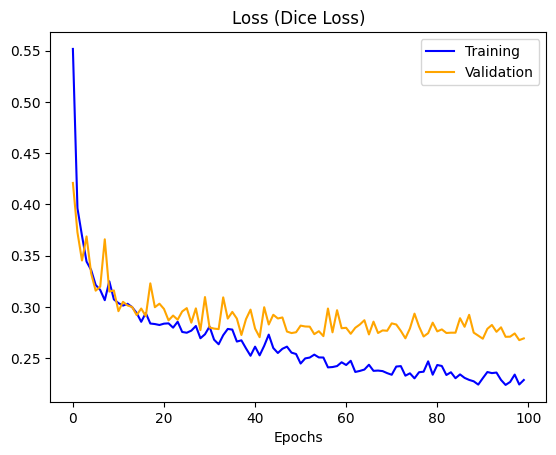

In [ ]:
plt.plot(range(100), loss, color="blue", label="Training")
plt.plot(range(100), val_loss, color="orange", label="Validation")
plt.legend()
plt.title("Loss (Dice Loss)")
plt.xlabel("Epochs")
plt.show()

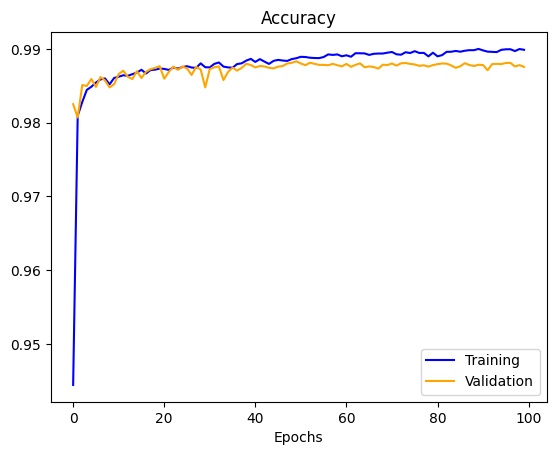

In [ ]:
plt.plot(range(100), accuracy, color="blue", label="Training")
plt.plot(range(100), val_accuracy, color="orange", label="Validation")
plt.legend()
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.show()

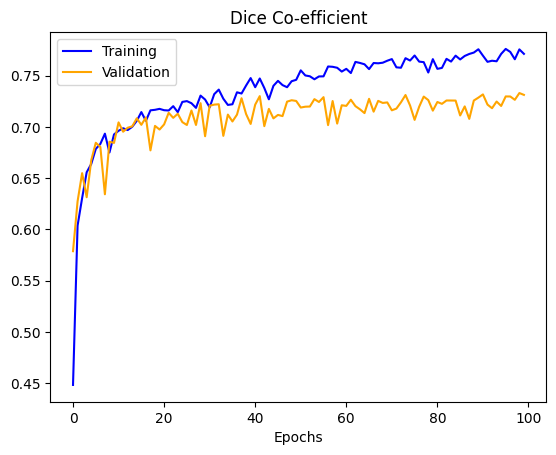

In [ ]:
plt.plot(range(100), dice, color="blue", label="Training")
plt.plot(range(100), val_dice, color="orange", label="Validation")
plt.legend()
plt.title("Dice Co-efficient")
plt.xlabel("Epochs")
plt.show()

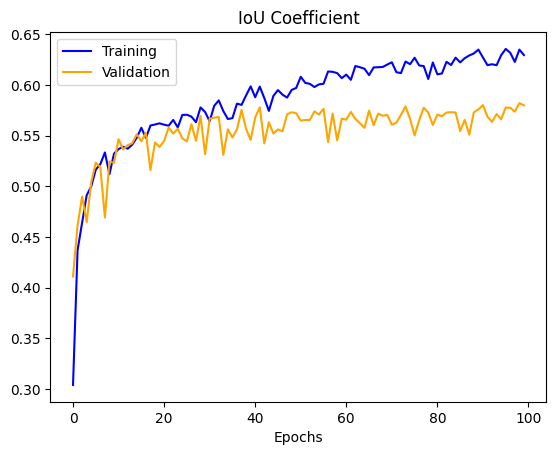

In [ ]:
plt.plot(range(100), iou, color="blue", label="Training")
plt.plot(range(100), val_iou, color="orange", label="Validation")
plt.legend()
plt.title("IoU Coefficient")
plt.xlabel("Epochs")
plt.show()

In [ ]:
print("Training Evaluation Metrics:\nLoss: {:0.5f}\nAccuracy: {:0.2f}%\n\
Dice Co-efficient: {:0.2f}%\nIoU: {:0.2f}%".format(loss[-1], accuracy[-1]*100, dice[-1]*100, iou[-1]*100))

Training Evaluation Metrics:
Loss: 0.22881
Accuracy: 98.99%
Dice Co-efficient: 77.12%
IoU: 62.95%


In [ ]:
print("Validation Evaluation Metrics:\nLoss: {:0.5f}\nAccuracy: {:0.2f}%\n\
Dice Co-efficient: {:0.2f}%\nIoU: {:0.2f}%".format(val_loss[-1], val_accuracy[-1]*100, val_dice[-1]*100, val_iou[-1]*100))

Validation Evaluation Metrics:
Loss: 0.26938
Accuracy: 98.76%
Dice Co-efficient: 73.12%
IoU: 57.99%


## Predictions using Model trained using Dice Loss

In [ ]:
predictions = model_dice.predict(X_test[[10, 23, 88]])
predictions[predictions < 0.3] = 0
predictions[predictions > 0.3] = 1

1/1 [==============================] - 0s 42ms/step


Text(0.5, 1.0, 'Actual/True Mask')

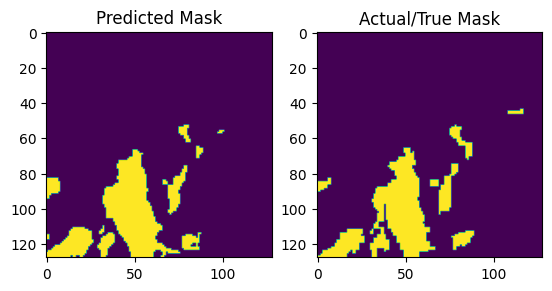

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(predictions[0])
plt.title("Predicted Mask")
plt.subplot(1, 2, 2)
plt.imshow(y_test[10])
plt.title("Actual/True Mask")

Text(0.5, 1.0, 'Actual/True Mask')

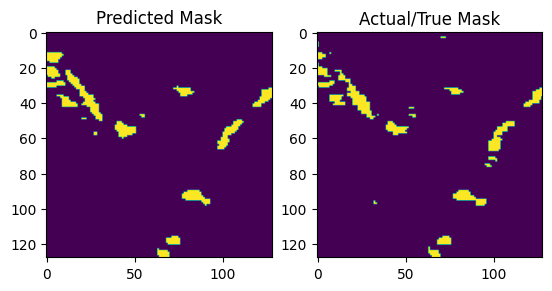

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(predictions[1])
plt.title("Predicted Mask")
plt.subplot(1, 2, 2)
plt.imshow(y_test[23])
plt.title("Actual/True Mask")

Text(0.5, 1.0, 'Actual/True Mask')

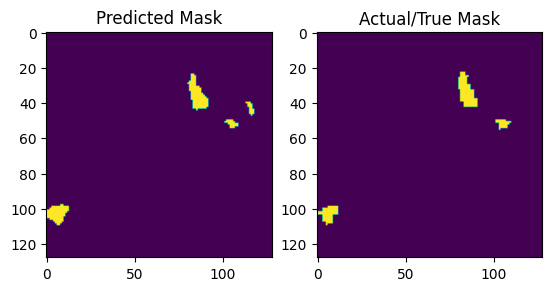

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(predictions[2])
plt.title("Predicted Mask")
plt.subplot(1, 2, 2)
plt.imshow(y_test[88])
plt.title("Actual/True Mask")

## Res-UNet

In [ ]:
def bn_act(x, act=True):
    x = BatchNormalization()(x)
    if act == True:
        x = Activation("relu")(x)
    return x

def conv_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    conv = bn_act(x)
    conv = Conv2D(filters, kernel_size, padding=padding, strides=strides)(conv)
    return conv

def stem(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    conv = Conv2D(filters, kernel_size, padding=padding, strides=strides)(x)
    conv = conv_block(conv, filters, kernel_size=kernel_size, padding=padding, strides=strides)

    shortcut = Conv2D(filters, kernel_size=(1, 1), padding=padding, strides=strides)(x)
    shortcut = bn_act(shortcut, act=False)

    output = Add()([conv, shortcut])
    return output

def residual_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    res = conv_block(x, filters, kernel_size=kernel_size, padding=padding, strides=strides)
    res = conv_block(res, filters, kernel_size=kernel_size, padding=padding, strides=1)

    shortcut = Conv2D(filters, kernel_size=(1, 1), padding=padding, strides=strides)(x)
    shortcut = bn_act(shortcut, act=False)

    output = Add()([shortcut, res])
    return output

def upsample_concat_block(x, xskip):
    u = UpSampling2D((2, 2))(x)
    c = Concatenate()([u, xskip])
    return c

In [ ]:
def ResUNet(image_size, channels):
    f = [16, 32, 64, 128, 256]
    inputs = Input((image_size, image_size, channels))

    ## Encoder
    e0 = inputs
    e1 = stem(e0, f[0])
    e2 = residual_block(e1, f[1], strides=2)
    e3 = residual_block(e2, f[2], strides=2)
    e4 = residual_block(e3, f[3], strides=2)

    ## Bridge
    b0 = residual_block(e4, f[4], strides=2)

    ## Decoder
    u1 = upsample_concat_block(b0, e4)
    d1 = residual_block(u1, f[4])

    u2 = upsample_concat_block(d1, e3)
    d2 = residual_block(u2, f[3])

    u3 = upsample_concat_block(d2, e2)
    d3 = residual_block(u3, f[2])

    u4 = upsample_concat_block(d3, e1)
    d4 = residual_block(u4, f[1])

    outputs = Conv2D(1, (1, 1), padding="same", activation="sigmoid")(d4)
    model = Model(inputs, outputs)
    return model

In [ ]:
model = ResUNet(128, 6)
adam = tf.keras.optimizers.Adam()
model.compile(optimizer=adam, loss=dice_coef_loss, metrics=["accuracy", dice_coef, iou_coef])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 6  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_28 (Conv2D)             (None, 128, 128, 16  880         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_26 (BatchN  (None, 128, 128, 16  64         ['conv2d_28[0][0]']              
 ormalization)                  )                                                           

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pickle as pkl

filename = "drive/MyDrive/CAPSTONE LANDSLIDE/TRAIN_XX"
with open(filename, 'rb') as fileObject:
    X_train = pkl.load(fileObject)

filename = "drive/MyDrive/CAPSTONE LANDSLIDE/TRAIN_YY"
with open(filename, 'rb') as fileObject:
    y_train = pkl.load(fileObject)

# Deal with missing values
X_train[np.isnan(X_train)] = 0.000001

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

Mounted at /content/drive


In [ ]:
history = model.fit(X_train, y_train, batch_size=16,
          epochs=100,
          verbose = 2,
          validation_data=(X_test, y_test))

Epoch 1/100
190/190 - 62s - loss: 0.4355 - accuracy: 0.9768 - dice_coef: 0.5645 - iou_coef: 0.4051 - val_loss: 0.5138 - val_accuracy: 0.9815 - val_dice_coef: 0.4833 - val_iou_coef: 0.3267 - 62s/epoch - 328ms/step
Epoch 2/100
190/190 - 20s - loss: 0.3755 - accuracy: 0.9832 - dice_coef: 0.6245 - iou_coef: 0.4625 - val_loss: 0.3774 - val_accuracy: 0.9847 - val_dice_coef: 0.6211 - val_iou_coef: 0.4597 - 20s/epoch - 105ms/step
Epoch 3/100
190/190 - 20s - loss: 0.3897 - accuracy: 0.9832 - dice_coef: 0.6103 - iou_coef: 0.4477 - val_loss: 0.3417 - val_accuracy: 0.9846 - val_dice_coef: 0.6579 - val_iou_coef: 0.4989 - 20s/epoch - 105ms/step
Epoch 4/100
190/190 - 20s - loss: 0.3597 - accuracy: 0.9839 - dice_coef: 0.6403 - iou_coef: 0.4781 - val_loss: 0.3482 - val_accuracy: 0.9822 - val_dice_coef: 0.6511 - val_iou_coef: 0.4910 - 20s/epoch - 106ms/step
Epoch 5/100
190/190 - 19s - loss: 0.3487 - accuracy: 0.9848 - dice_coef: 0.6513 - iou_coef: 0.4901 - val_loss: 0.3227 - val_accuracy: 0.9861 - val_d

In [ ]:
model.save("drive/MyDrive/models/resunet")

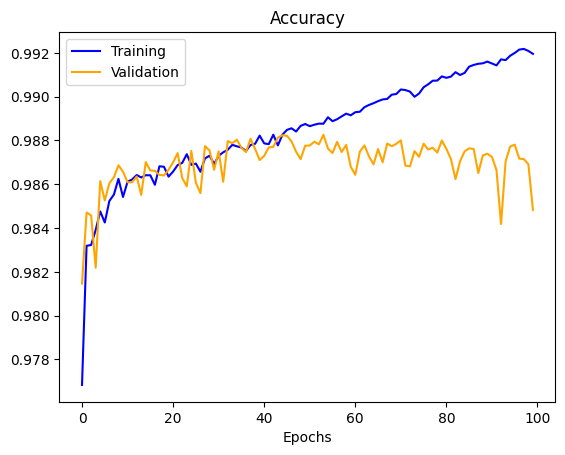

In [ ]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]

plt.plot(range(100), accuracy, color="blue", label="Training")
plt.plot(range(100), val_accuracy, color="orange", label="Validation")
plt.legend()
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.show()

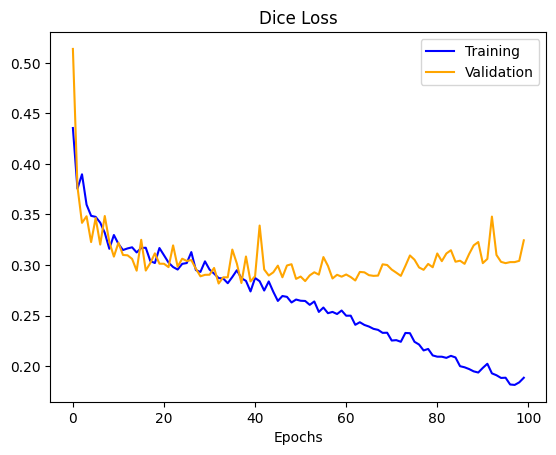

In [ ]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]

plt.plot(range(100), loss, color="blue", label="Training")
plt.plot(range(100), val_loss, color="orange", label="Validation")
plt.legend()
plt.title("Dice Loss")
plt.xlabel("Epochs")
plt.show()

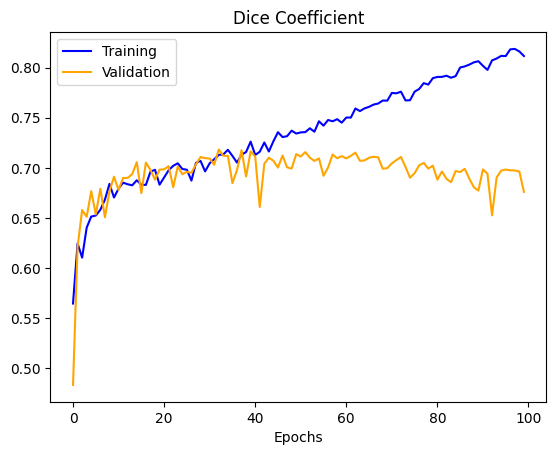

In [ ]:
dice = history.history["dice_coef"]
val_dice = history.history["val_dice_coef"]


plt.plot(range(100), dice, color="blue", label="Training")
plt.plot(range(100), val_dice, color="orange", label="Validation")
plt.legend()
plt.title("Dice Coefficient")
plt.xlabel("Epochs")
plt.show()

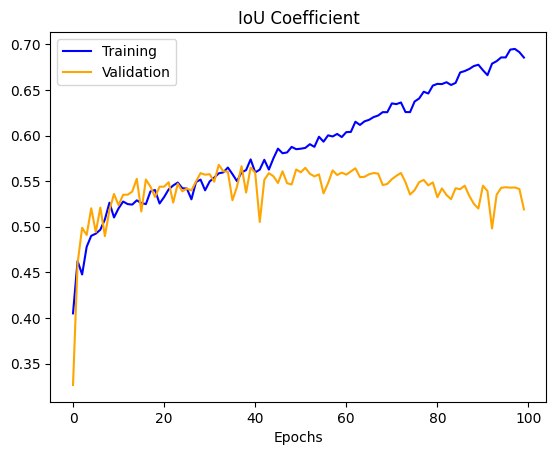

In [ ]:
iou = history.history["iou_coef"]
val_iou = history.history["val_iou_coef"]


plt.plot(range(100), iou, color="blue", label="Training")
plt.plot(range(100), val_iou, color="orange", label="Validation")
plt.legend()
plt.title("IoU Coefficient")
plt.xlabel("Epochs")
plt.show()

In [ ]:
print("Training Evaluation Metrics:\nLoss: {:0.5f}\nAccuracy: {:0.2f}%\n\
Dice Co-efficient: {:0.2f}%\nIoU: {:0.2f}%".format(min(loss), max(accuracy)*100, max(dice)*100, max(iou)*100))

Training Evaluation Metrics:
Loss: 0.18137
Accuracy: 99.22%
Dice Co-efficient: 81.86%
IoU: 69.49%


In [ ]:
predictions = model.predict(X_test[[10, 47, 88, 32, 532, 358, 23]])

1/1 [==============================] - 1s 1s/step


Text(0.5, 1.0, 'Actual/True Mask')

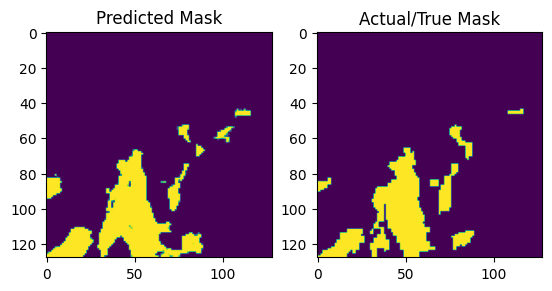

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(predictions[0])
plt.title("Predicted Mask")
plt.subplot(1, 2, 2)
plt.imshow(y_test[10])
plt.title("Actual/True Mask")

Text(0.5, 1.0, 'Actual/True Mask')

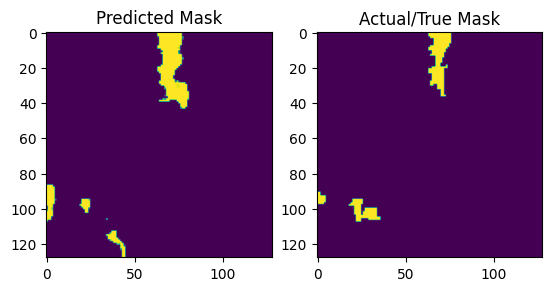

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(predictions[1])
plt.title("Predicted Mask")
plt.subplot(1, 2, 2)
plt.imshow(y_test[47])
plt.title("Actual/True Mask")

Text(0.5, 1.0, 'Actual/True Mask')

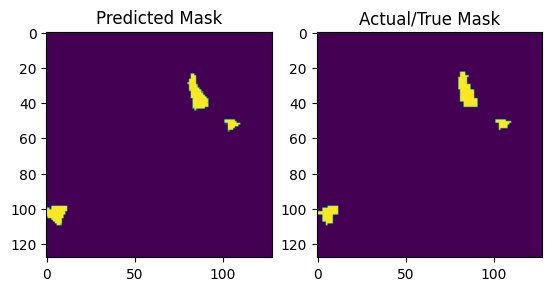

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(predictions[2])
plt.title("Predicted Mask")
plt.subplot(1, 2, 2)
plt.imshow(y_test[88])
plt.title("Actual/True Mask")

Text(0.5, 1.0, 'Actual/True Mask')

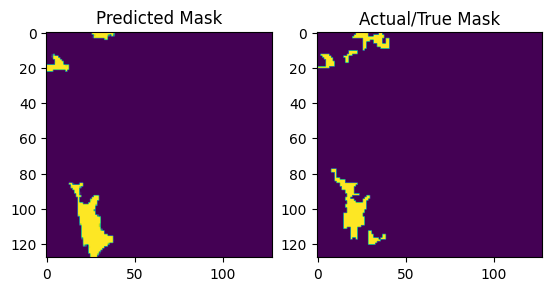

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(predictions[3])
plt.title("Predicted Mask")
plt.subplot(1, 2, 2)
plt.imshow(y_test[32])
plt.title("Actual/True Mask")

Text(0.5, 1.0, 'Actual/True Mask')

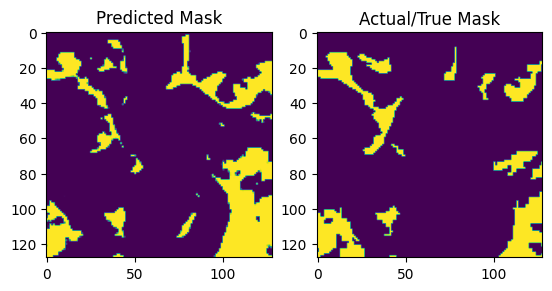

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(predictions[4])
plt.title("Predicted Mask")
plt.subplot(1, 2, 2)
plt.imshow(y_test[532])
plt.title("Actual/True Mask")

Text(0.5, 1.0, 'Actual/True Mask')

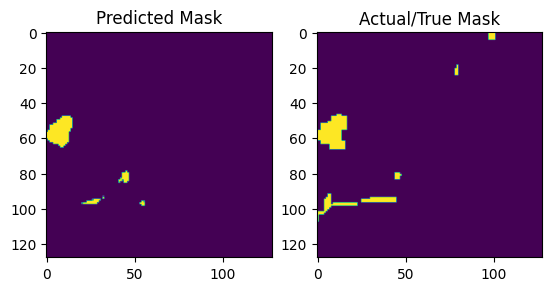

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(predictions[5])
plt.title("Predicted Mask")
plt.subplot(1, 2, 2)
plt.imshow(y_test[358])
plt.title("Actual/True Mask")

Text(0.5, 1.0, 'Actual/True Mask')

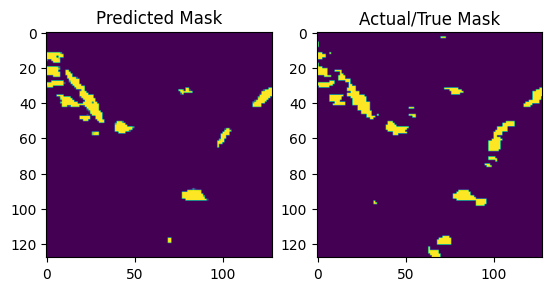

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(predictions[6])
plt.title("Predicted Mask")
plt.subplot(1, 2, 2)
plt.imshow(y_test[23])
plt.title("Actual/True Mask")

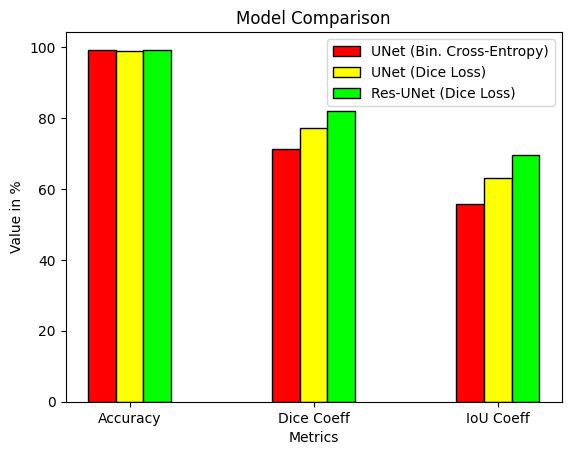

In [ ]:
m0 = [99.14, 71.37, 55.80] # UNet 1
m1 = [98.99, 77.12, 62.95] # UNet 2
m2 = [99.22, 81.86, 69.49] # Res-UNet 1

import matplotlib.pyplot as plt

X = ['Accuracy','Dice Coeff','IoU Coeff']
import numpy as np
X_axis = np.arange(len(X))

plt.bar(X_axis - 0.15, m0, 0.15, label = 'UNet (Bin. Cross-Entropy)', color="red", edgecolor="black")
plt.bar(X_axis, m1, 0.15, label = 'UNet (Dice Loss)', color="yellow", edgecolor="black")
plt.bar(X_axis + 0.15, m2, 0.15, label = 'Res-UNet (Dice Loss)', color="lime", edgecolor="black")

plt.xticks(X_axis, X)
plt.xlabel("Metrics")
plt.ylabel("Value in %")
plt.title("Model Comparison")
plt.legend()
plt.show()